<a href="https://colab.research.google.com/github/rtiwari6-stats/fraud-classifier/blob/main/Online_Payments_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#data exploration for fraud detection

#load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("fraud-full.csv")

data.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [5]:

data.isnull().sum()


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

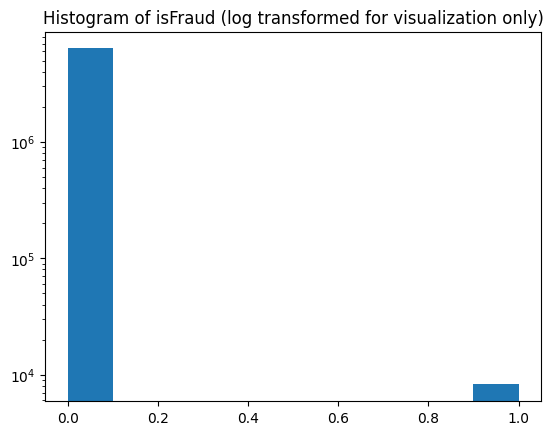

In [6]:
plt.yscale('log')
plt.hist(data["isFraud"])
plt.title("Histogram of isFraud (log transformed for visualization only)")
plt.show()

In [7]:
data['isFraud'].value_counts()


0    6354407
1       8213
Name: isFraud, dtype: int64

In [8]:
data.drop(['isFlaggedFraud'], axis=1, inplace=True)
data.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [9]:
# we have an unbalanced dataset so we use stratified sampling to ensure same distribution of
#fradulent transactions in training and test
#train-test split is 0.7:0.3

from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_index, test_index in split.split(data, data["isFraud"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

X = strat_train_set.drop("isFraud", axis=1)
y = strat_train_set["isFraud"].copy()

X_test = strat_test_set.drop("isFraud", axis=1)
y_test = strat_test_set["isFraud"].copy()




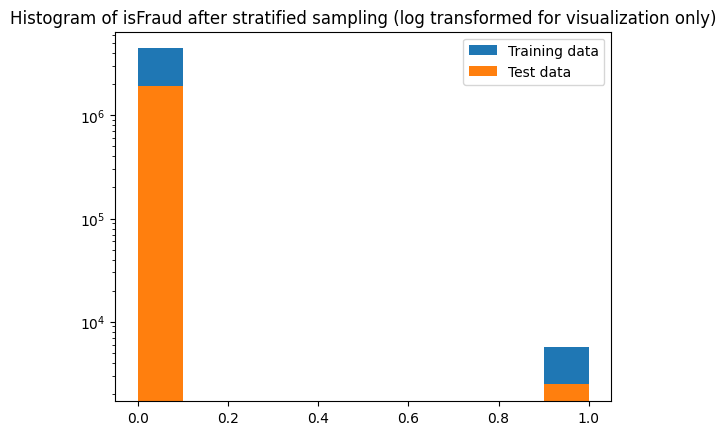

In [10]:
import matplotlib.pyplot as plt

plt.yscale('log')
plt.hist(strat_train_set["isFraud"], label="Training data")
plt.hist(strat_test_set["isFraud"], label="Test data")
plt.title("Histogram of isFraud after stratified sampling (log transformed for visualization only)")
plt.legend()
plt.show()

In [11]:
X.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
dtype: object

In [12]:
X['type'].value_counts()

CASH_OUT    1565926
PAYMENT     1506155
CASH_IN      979750
TRANSFER     373044
DEBIT         28959
Name: type, dtype: int64

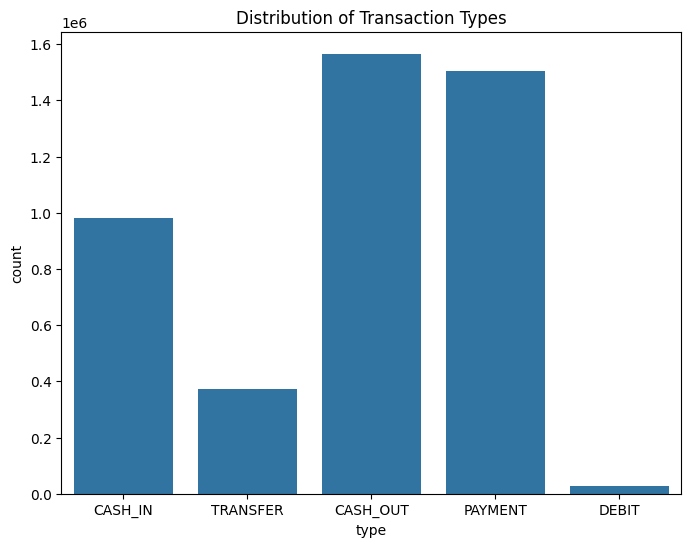

In [14]:
plt.figure(figsize=(8, 6))
import seaborn as sns
sns.countplot(x='type', data=X)
plt.title('Distribution of Transaction Types')
plt.show()

In [15]:
print(data[['type','isFraud']].value_counts())


type      isFraud
CASH_OUT  0          2233384
PAYMENT   0          2151495
CASH_IN   0          1399284
TRANSFER  0           528812
DEBIT     0            41432
CASH_OUT  1             4116
TRANSFER  1             4097
dtype: int64


type
CASH_OUT    2882
TRANSFER    2867
dtype: int64


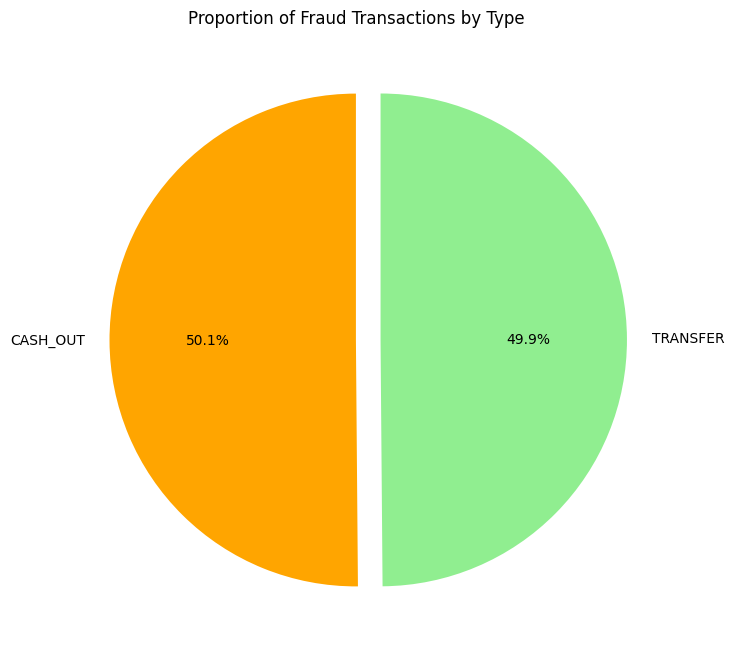

In [16]:
fraud_transactions = X[y == 1]
fraud_counts_by_type = fraud_transactions.groupby('type').size()
print(fraud_counts_by_type)

plt.figure(figsize=(8, 8))
plt.pie(fraud_counts_by_type, labels=fraud_counts_by_type.index, autopct='%1.1f%%', startangle=90,
        colors=['orange', 'lightgreen'], explode=(0, 0.1))
plt.title('Proportion of Fraud Transactions by Type')
plt.show()

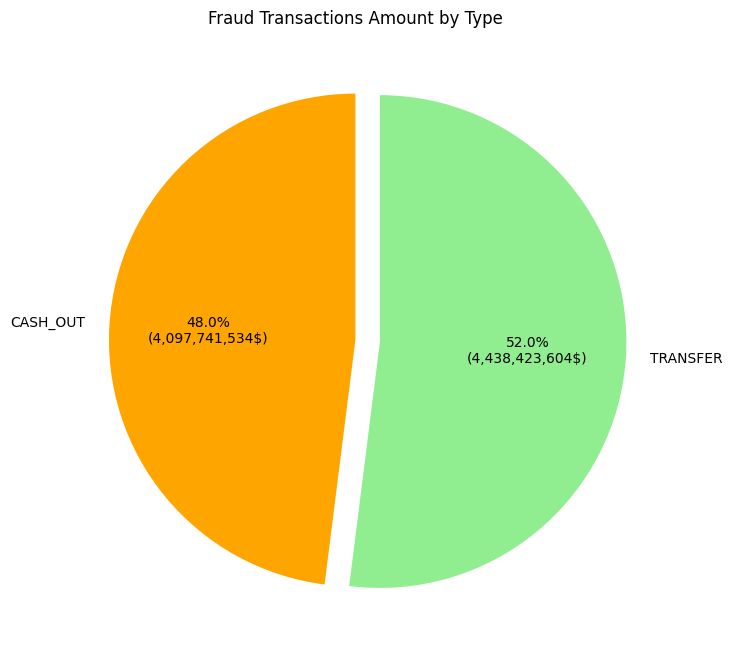

In [17]:
fraud_amounts_by_type = X[y == 1].groupby("type")["amount"].sum()
plt.figure(figsize=(8, 8))
plt.pie(fraud_amounts_by_type, labels=fraud_amounts_by_type.index,
        autopct=lambda p: f'{p:.1f}%\n({p * sum(fraud_amounts_by_type) / 100:,.0f}$)', startangle=90,
        colors=['orange', 'lightgreen'], explode=(0, 0.1))
plt.title('Fraud Transactions Amount by Type')
plt.show()

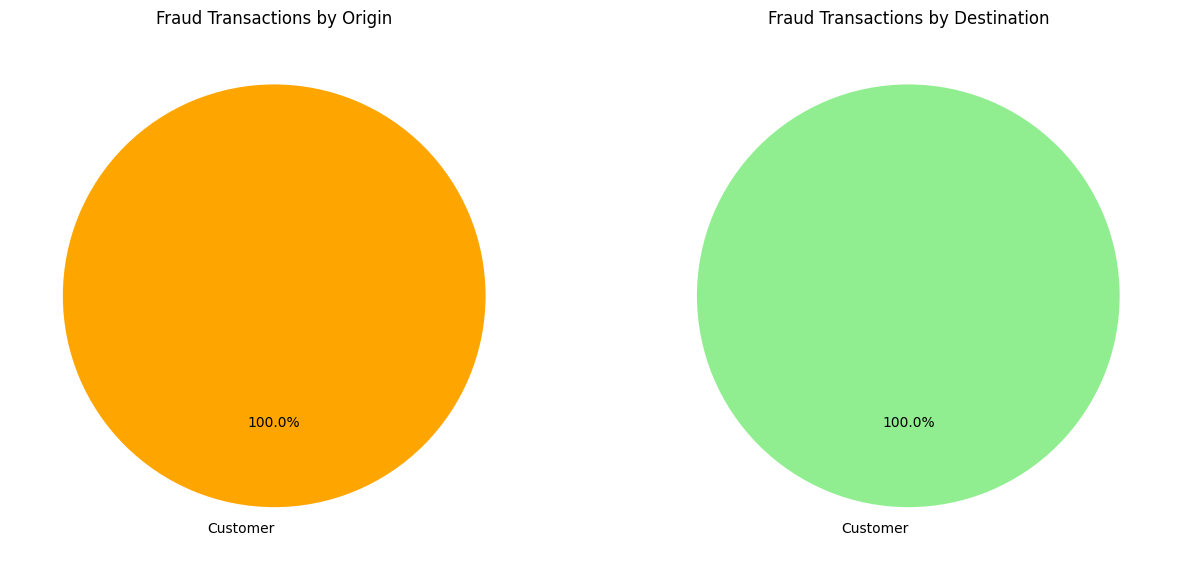

In [18]:
fraud_transactions = X[y == 1].copy()
fraud_transactions['nameOrg_first_letter'] = fraud_transactions['nameOrig'].str[0]
fraud_transactions['nameDest_first_letter'] = fraud_transactions['nameDest'].str[0]
fraud_transactions['nameOrg_first_letter'] = fraud_transactions['nameOrg_first_letter'].replace('C', 'Customer')
fraud_transactions['nameDest_first_letter'] = fraud_transactions['nameDest_first_letter'].replace('C', 'Customer')
fraud_by_name_orig_first_letter = fraud_transactions.groupby('nameOrg_first_letter').size()
fraud_by_name_dest_first_letter = fraud_transactions.groupby('nameDest_first_letter').size()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))

axes[0].pie(fraud_by_name_orig_first_letter, labels=fraud_by_name_orig_first_letter.index,
            autopct='%1.1f%%', startangle=90, colors=['orange'])
axes[0].set_title('Fraud Transactions by Origin')

axes[1].pie(fraud_by_name_dest_first_letter, labels=fraud_by_name_dest_first_letter.index,
            autopct='%1.1f%%', startangle=90, colors=['lightgreen'])
axes[1].set_title('Fraud Transactions by Destination')

plt.show()

In [19]:
pd.set_option('display.float_format', '{:,.2f}'.format)
print("Statistics about amounts for non-fraud transactions:\n",
      pd.DataFrame.describe(X[y == 0].amount), "\n")
print("Statistics about amounts for fraud transactions:\n",
      pd.DataFrame.describe(X[y == 1].amount), "\n")

Statistics about amounts for non-fraud transactions:
 count    4,448,085.00
mean       178,253.23
std        594,238.83
min              0.01
25%         13,367.20
50%         74,639.92
75%        208,291.17
max     92,445,516.64
Name: amount, dtype: float64 

Statistics about amounts for fraud transactions:
 count        5,749.00
mean     1,484,808.69
std      2,409,643.17
min              0.00
25%        127,447.68
50%        452,261.67
75%      1,555,182.41
max     10,000,000.00
Name: amount, dtype: float64 



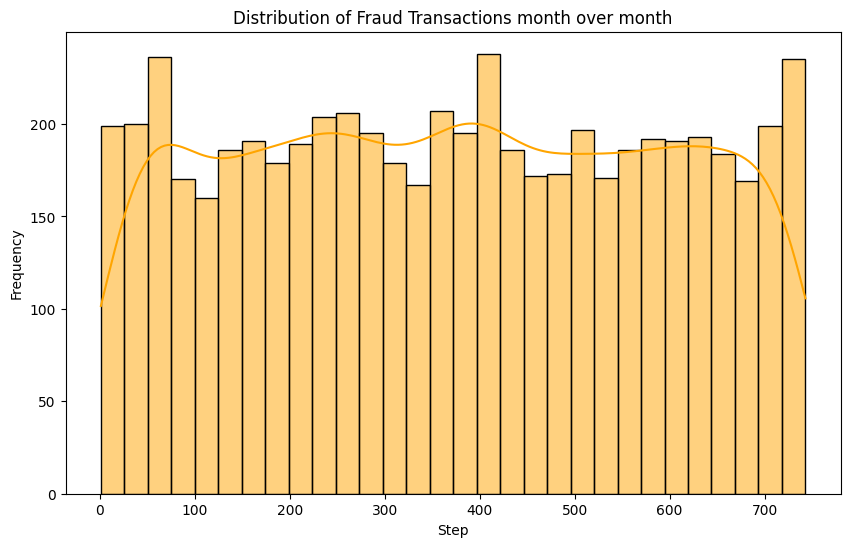

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(fraud_transactions["step"], bins=30, kde=True, color='orange', edgecolor='black')
plt.title('Distribution of Fraud Transactions month over month')
plt.xlabel('Step')
plt.ylabel('Frequency')
plt.show()

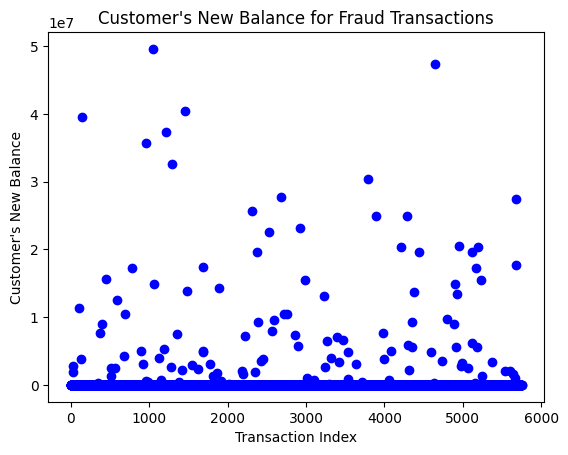

In [21]:
plt.scatter(range(len(fraud_transactions)), fraud_transactions['newbalanceOrig'], color='blue')
plt.title('Customer\'s New Balance for Fraud Transactions')
plt.xlabel('Transaction Index')
plt.ylabel('Customer\'s New Balance')
plt.show()

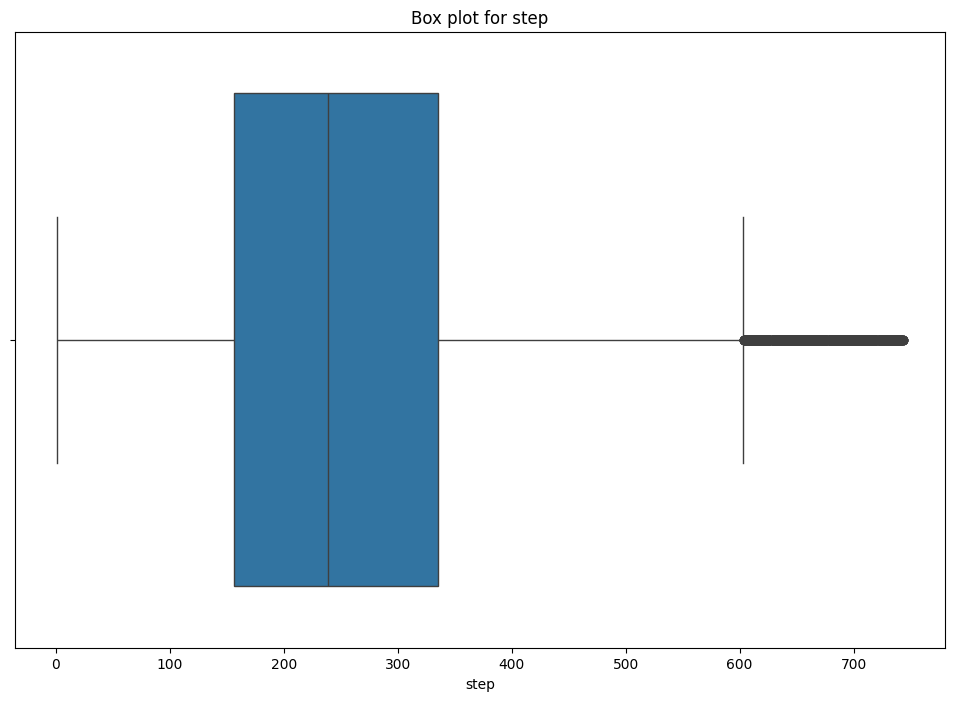

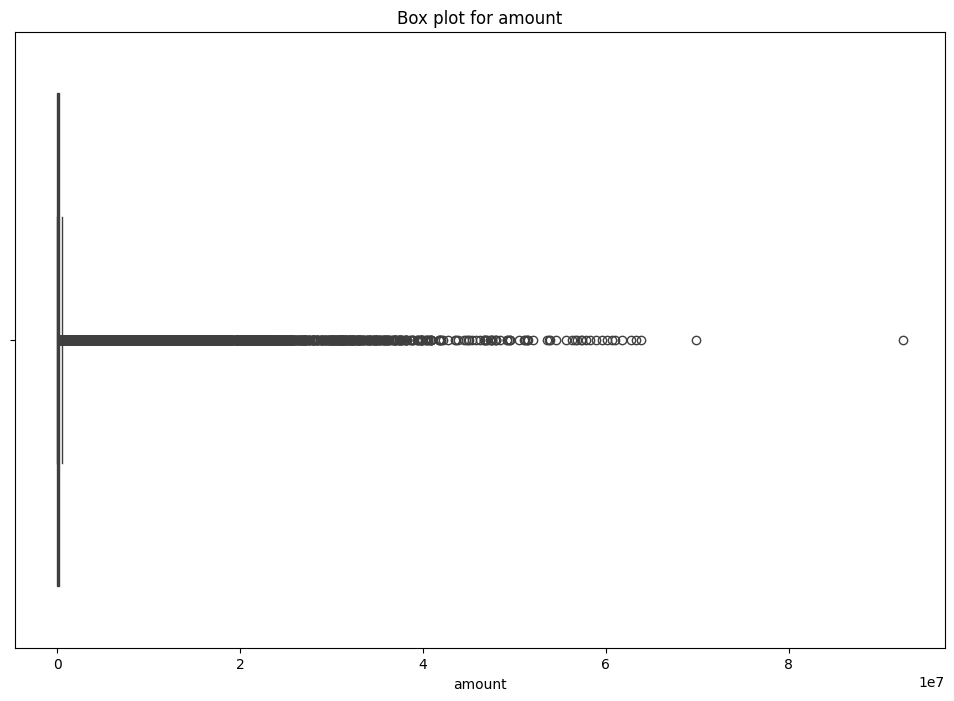

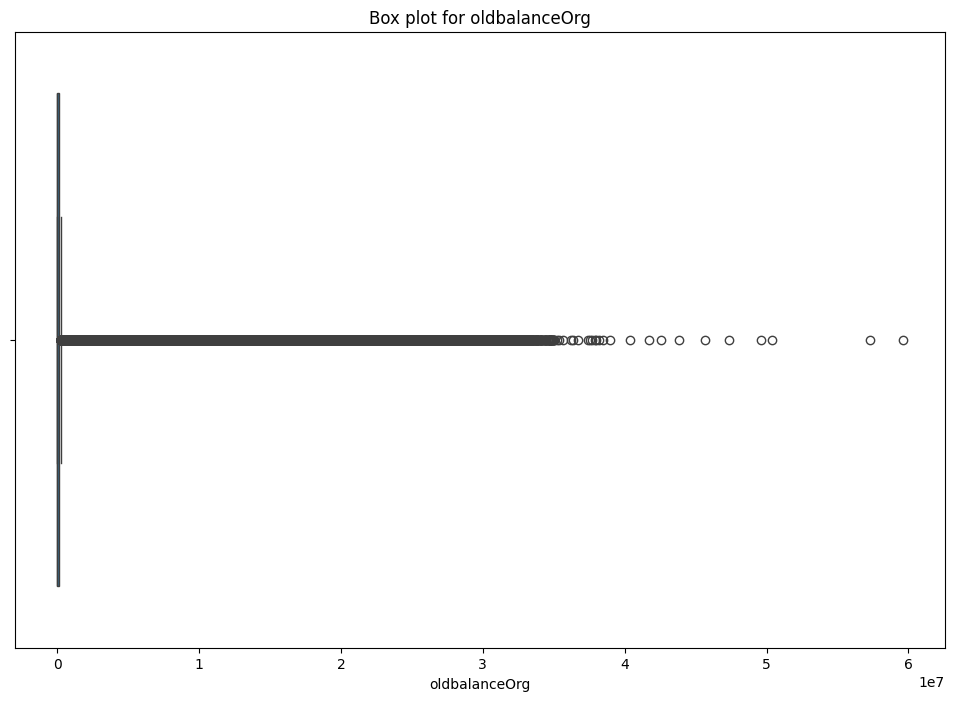

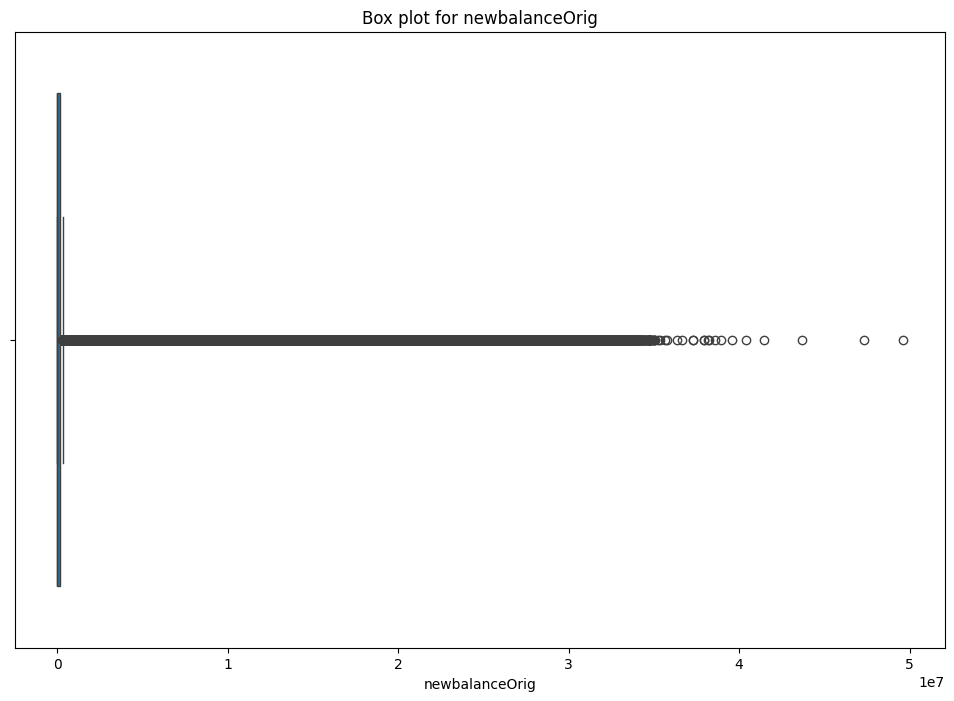

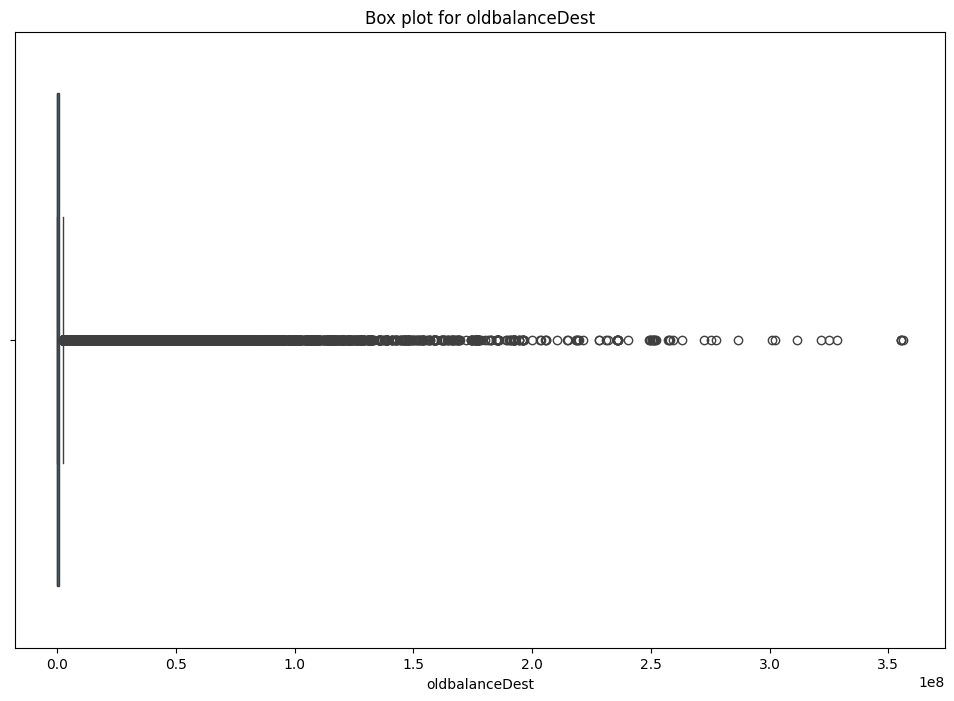

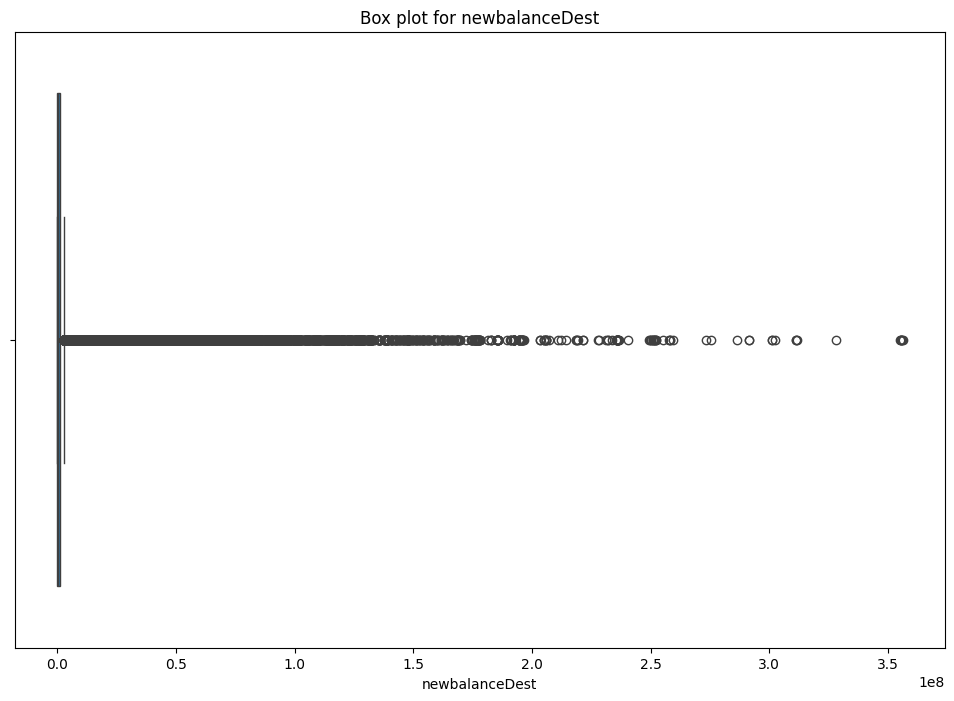

In [22]:
numeric_columns = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

for column in numeric_columns:
    plt.figure(figsize=(12, 8))
    sns.boxplot(x=(X[column]))
    plt.title(f'Box plot for {column}')
    plt.show()

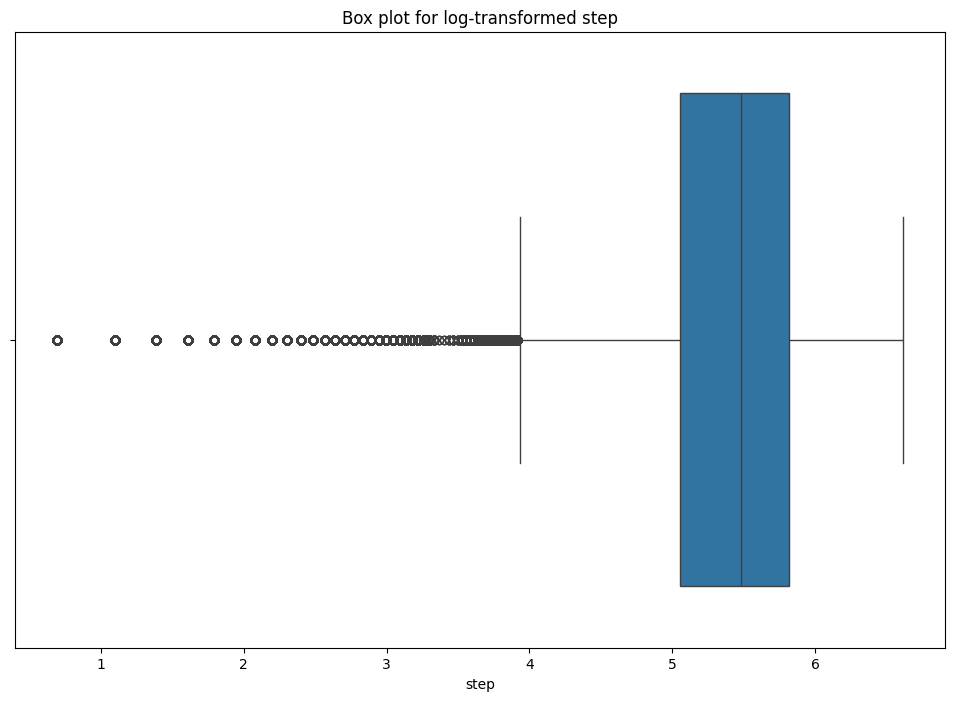

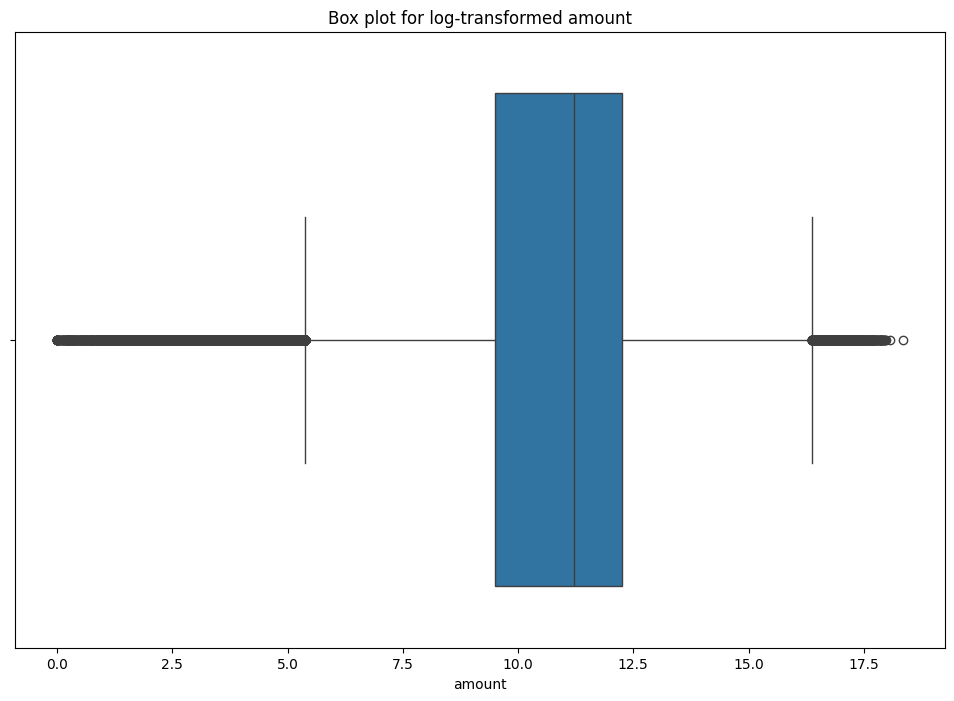

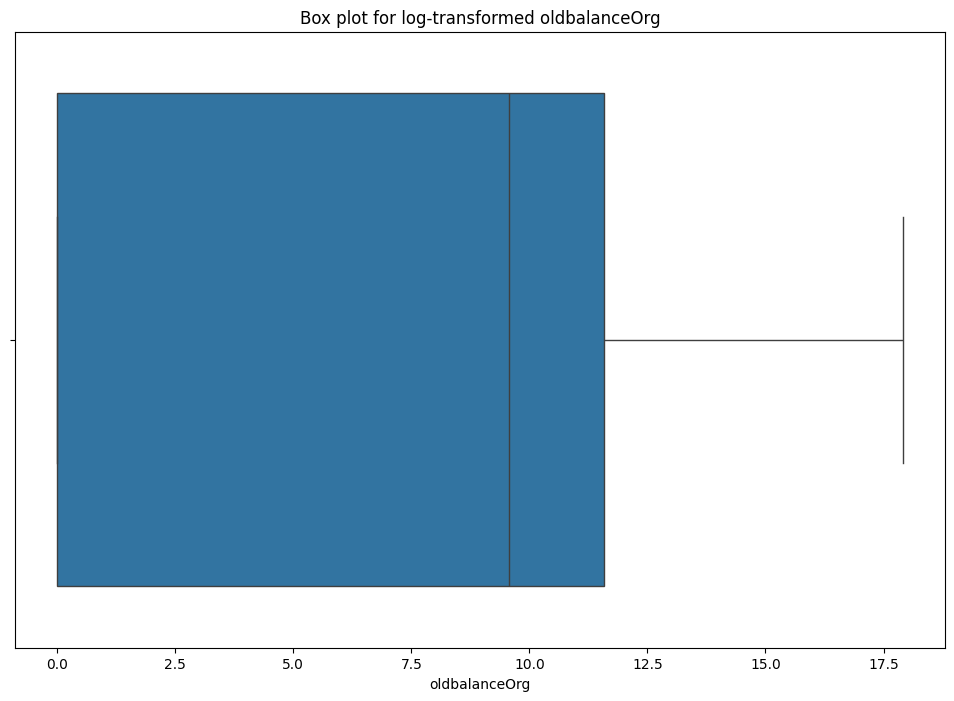

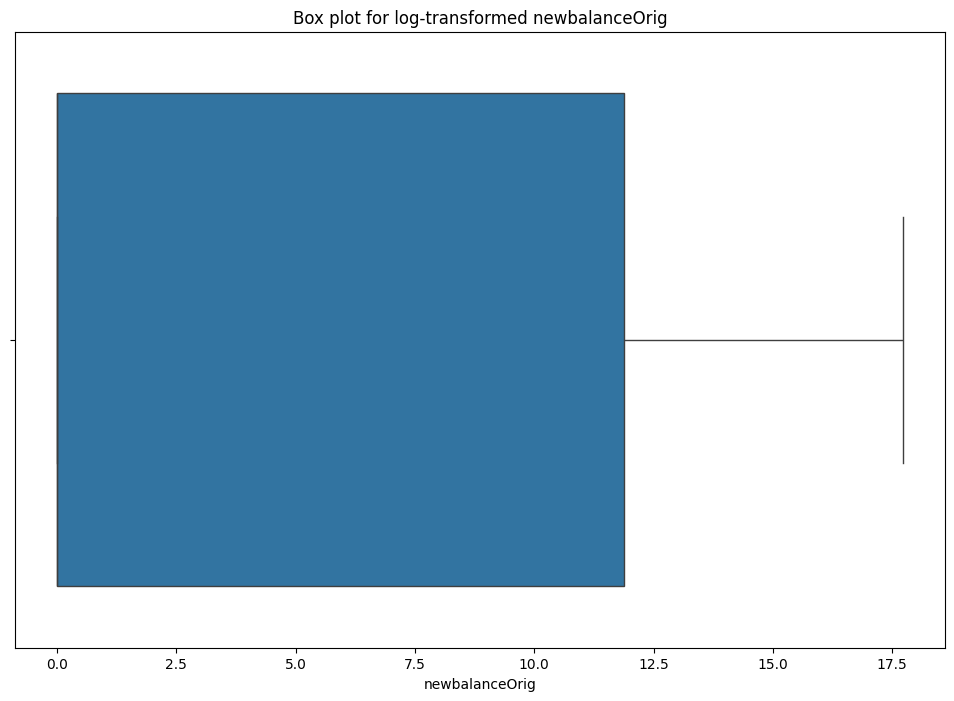

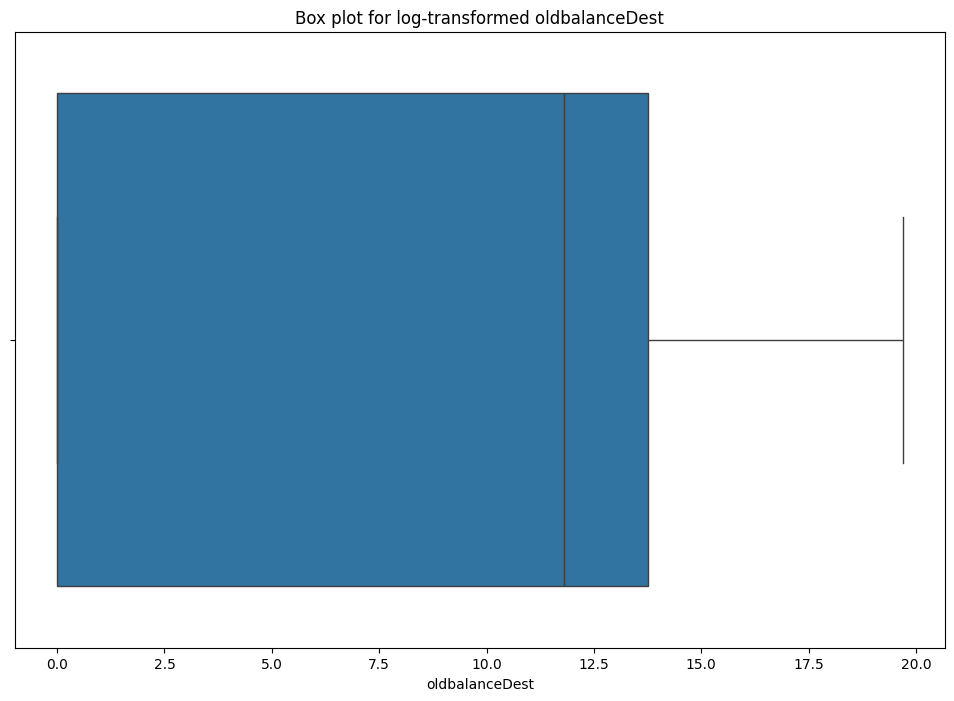

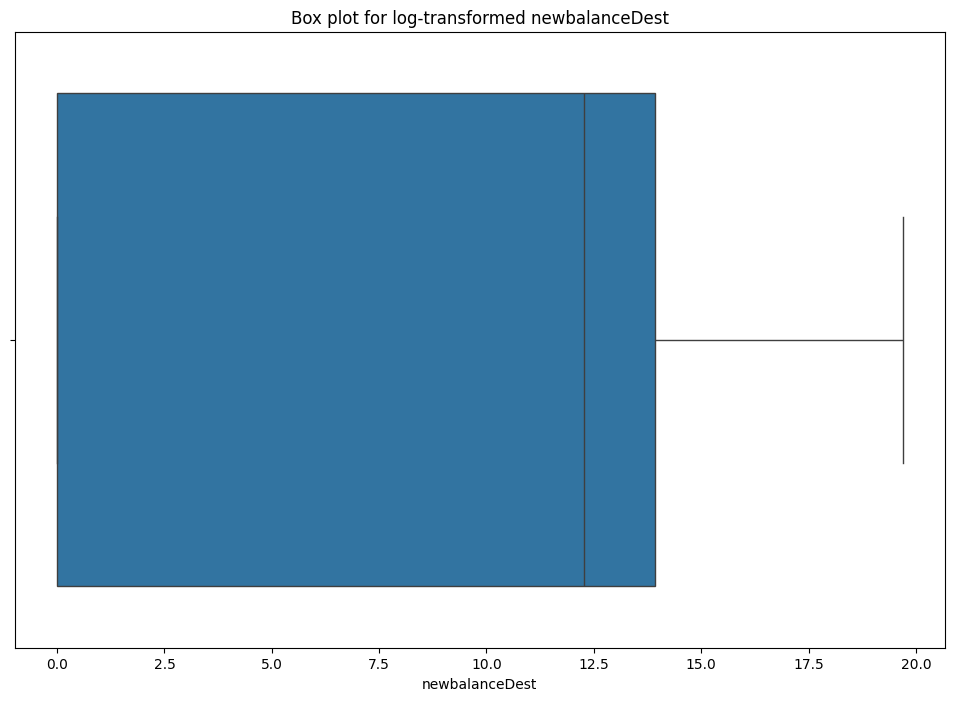

In [23]:
numeric_columns = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

for column in numeric_columns:
    plt.figure(figsize=(12, 8))
    sns.boxplot(x=np.log1p(X[column]))  # Applying log transformation
    plt.title(f'Box plot for log-transformed {column}')
    plt.show()

In [34]:
from sklearn.preprocessing import LabelEncoder, RobustScaler, OrdinalEncoder


for column in numeric_columns:
    X[column] = np.log1p(X[column])

robust_scaler = RobustScaler()
X[numeric_columns] = robust_scaler.fit_transform(X[numeric_columns])

label_encoder = LabelEncoder()
X['type'] = label_encoder.fit_transform(X['type'])



/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [42]:
X['isCustomerOrig'] = X['nameOrig'].str[0] == 'C'
X['isCustomerDest'] = X['nameDest'].str[0] == 'C'

X["isCustomerOrig"] = X["isCustomerOrig"].astype(int)
X["isCustomerDest"] = X["isCustomerDest"].astype(int)


X.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isCustomerOrig,isCustomerDest
4310249,0.03,0,0.29,C386091144,0.01,1.03,C268784004,0.04,0.03,1,1
318938,NaN,4,0.79,C977405179,0.05,0.00,C1032483118,-0.98,0.02,1,1
3375139,-0.41,4,0.74,C1091684896,0.02,0.00,C1969901822,-0.03,0.02,1,1
5492781,0.33,0,0.09,C300199504,0.03,1.02,C591887141,0.03,0.02,1,1
807263,NaN,0,NaN,C905217988,0.08,1.14,C926869366,0.03,0.02,1,1


In [44]:
X[X["isCustomerDest"] == 0]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isCustomerOrig,isCustomerDest
4707058,0.15,3,NaN,C394061453,0.03,0.98,M924331074,-0.98,-0.98,1,0
2163231,-3.23,3,NaN,C875453827,-0.97,0.00,M1093589852,-0.98,-0.98,1,0
6265624,0.74,3,NaN,C1423837410,0.03,1.00,M1844698831,-0.98,-0.98,1,0
5293434,0.31,3,-1.53,C202217517,-0.00,0.00,M321600863,-0.98,-0.98,1,0
4856369,0.22,3,-2.15,C2081921416,-0.97,0.00,M344604508,-0.98,-0.98,1,0
...,...,...,...,...,...,...,...,...,...,...,...
3129586,-0.66,3,NaN,C1021143141,0.04,1.00,M525200757,-0.98,-0.98,1,0
361127,NaN,3,NaN,C615177894,0.01,0.87,M1079815467,-0.98,-0.98,1,0
4182953,0.01,3,NaN,C545341724,-0.97,0.00,M253734860,-0.98,-0.98,1,0
3985280,-0.03,3,-2.43,C1831600144,-0.97,0.00,M1382629737,-0.98,-0.98,1,0


In [45]:
X[X["isCustomerOrig"] == 0]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isCustomerOrig,isCustomerDest
